On karate: minimize_blockmodel_dl and minimize_nested_blockmodel_dl returns only 1 block, 2 when using equilibrate

In [220]:
# module imports

import graph_tool as gt
# from graph_tool.all import *

import matplotlib.pyplot as plt

import numpy as np

In [ ]:
# module to create a graph from data and storing it

In [154]:
# loading graph from collection

#input graph name
graph_name = "football"


g = gt.collection.data[graph_name]


#graph type verification

print(type(g)) 
print(isinstance(g,graph_tool.Graph))


<class 'graph_tool.Graph'>
True


In [155]:
# graph info and properties
print(g)
print(g.list_properties())

<Graph object, undirected, with 115 vertices and 613 edges, 4 internal vertex properties, 2 internal graph properties, at 0x16b907160>
readme            (graph)   (type: string, val: The file football.gml contains
                                                the network of American
                                                football games between Division
                                                IA colleges during regular
                                                season Fall 2000, as compiled
                                                by M. Girvan and M. Newman.
                                                The nodes have values that
                                                indicate to which conferences
                                                they belong.  The values are as
                                                follows:    0 = Atlantic Coast
                                                1 = Big East   2 = Big Ten   3
              

In [200]:
# state = BlockState(g,B=2)

state = minimize_blockmodel_dl(g)
# help(minimize_blockmodel_dl)

# mcmc_equilibrate(state, wait=1000, mcmc_args=dict(niter=10))

In [201]:
print(state.get_Be())


9.856831269097063


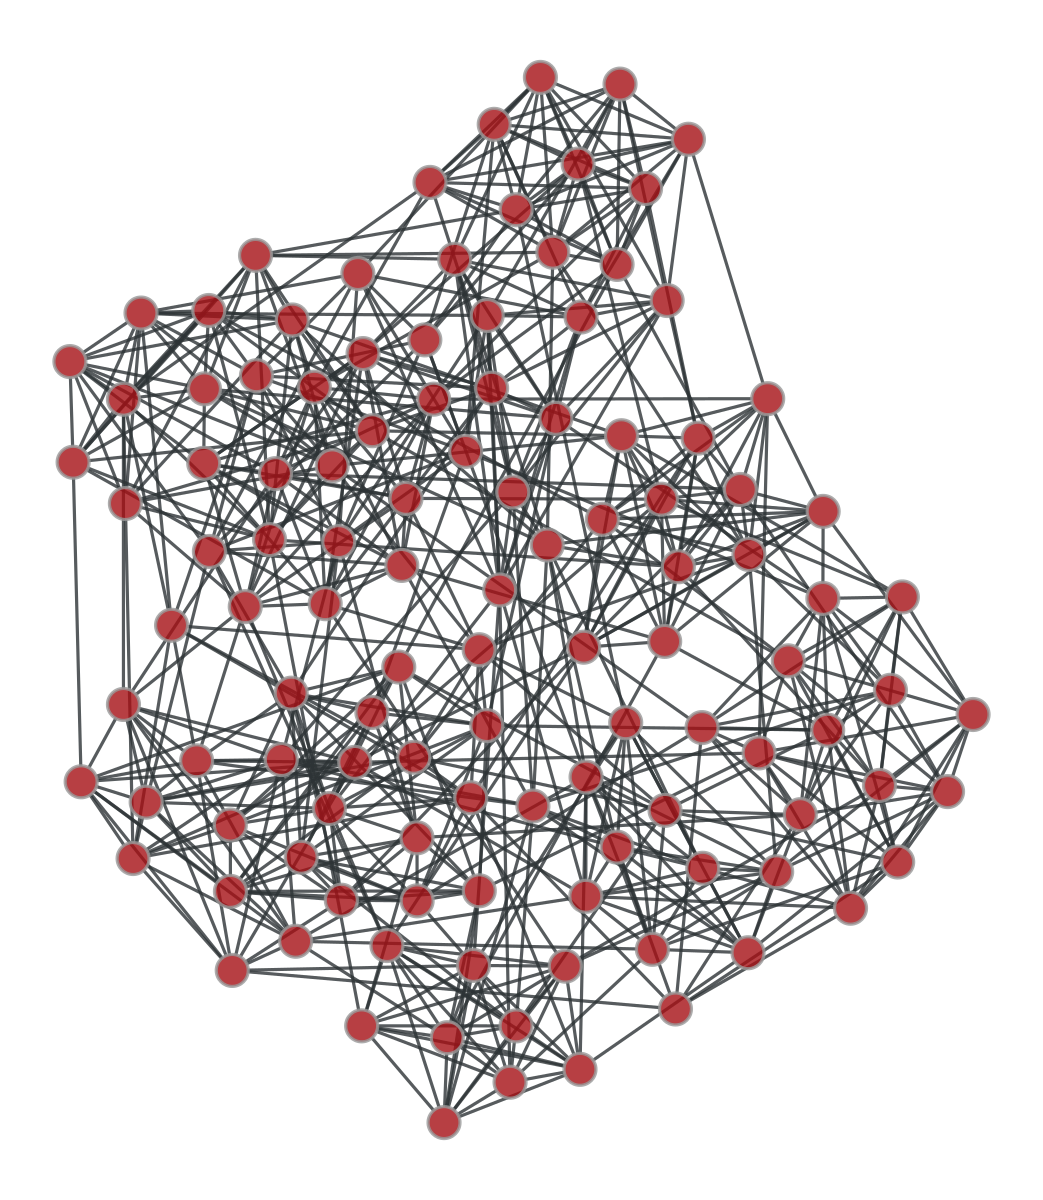

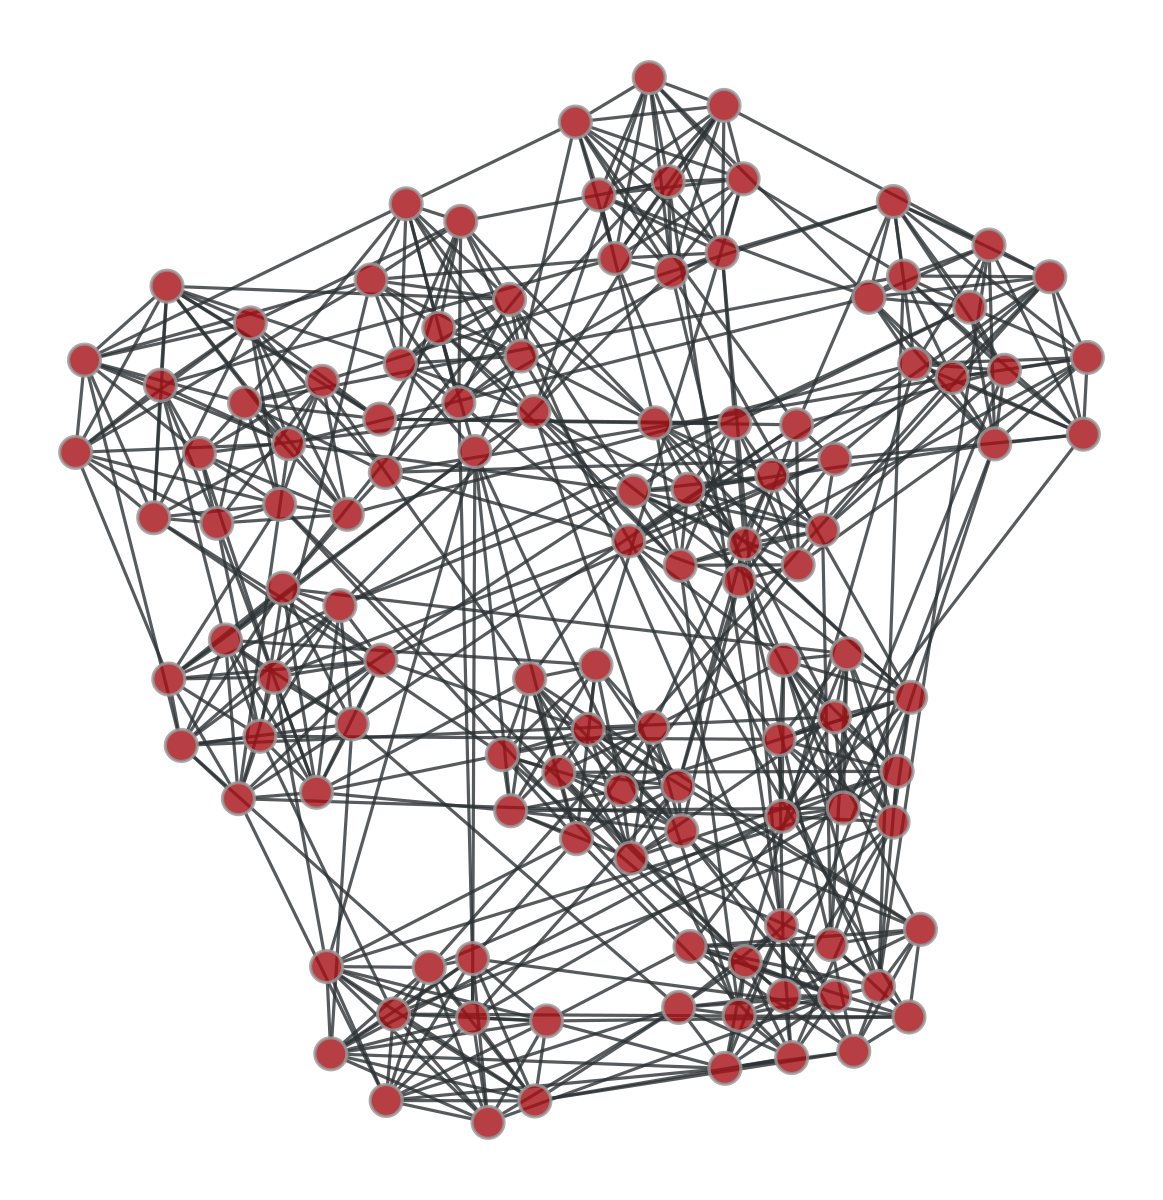

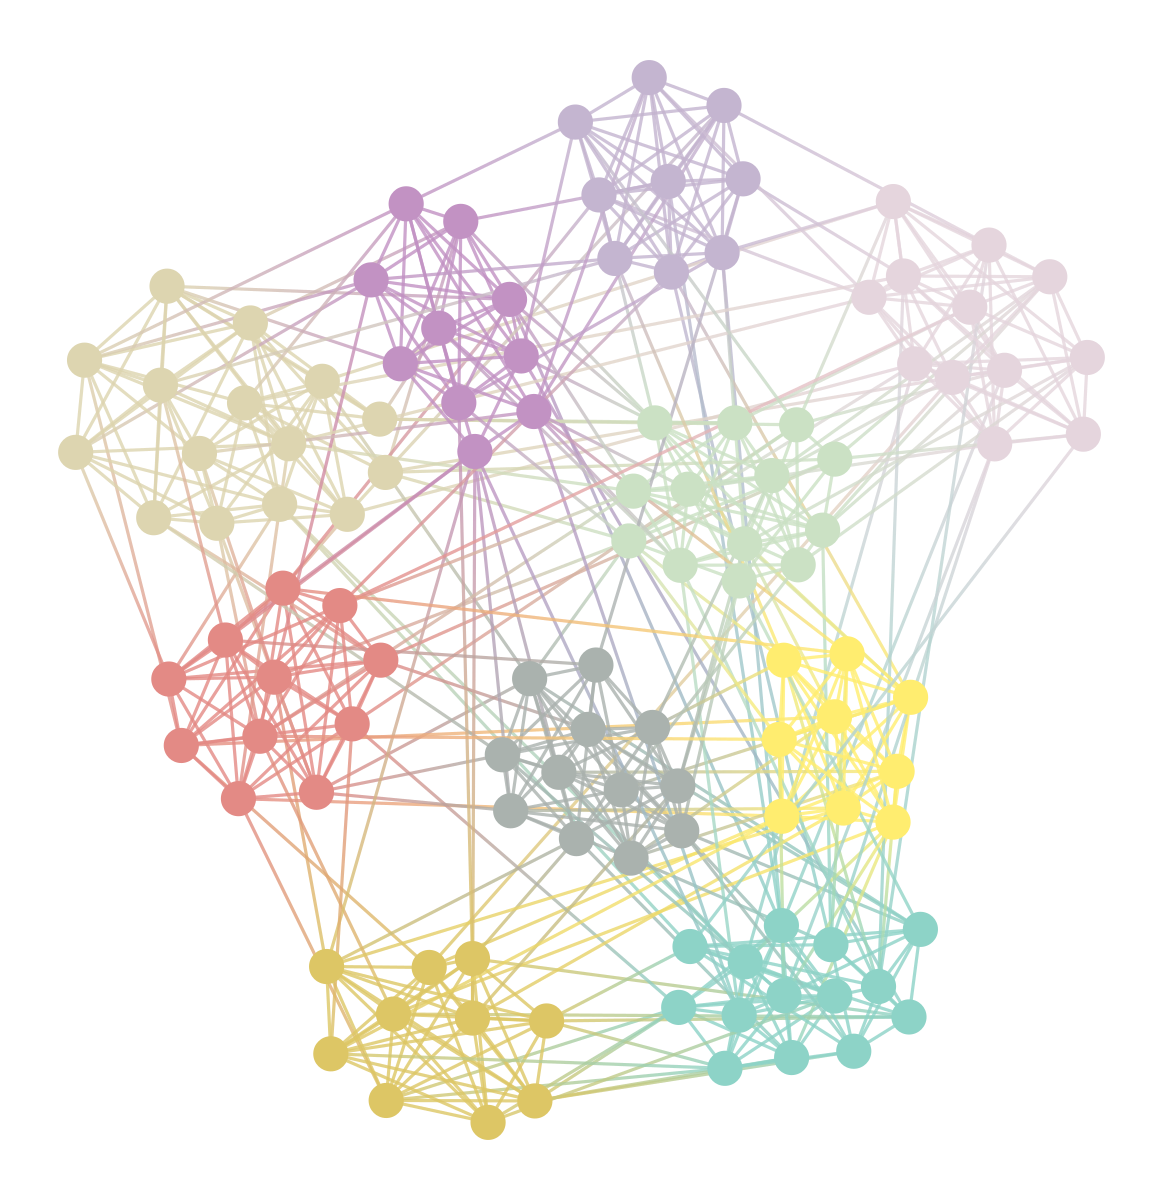

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x16b907160, at 0x16ea0a910>

In [202]:
graph_draw(g)
graph_draw(g,pos=g.vp.pos)
state.draw(pos=g.vp.pos)


<class 'graph_tool.PropertyArray'>


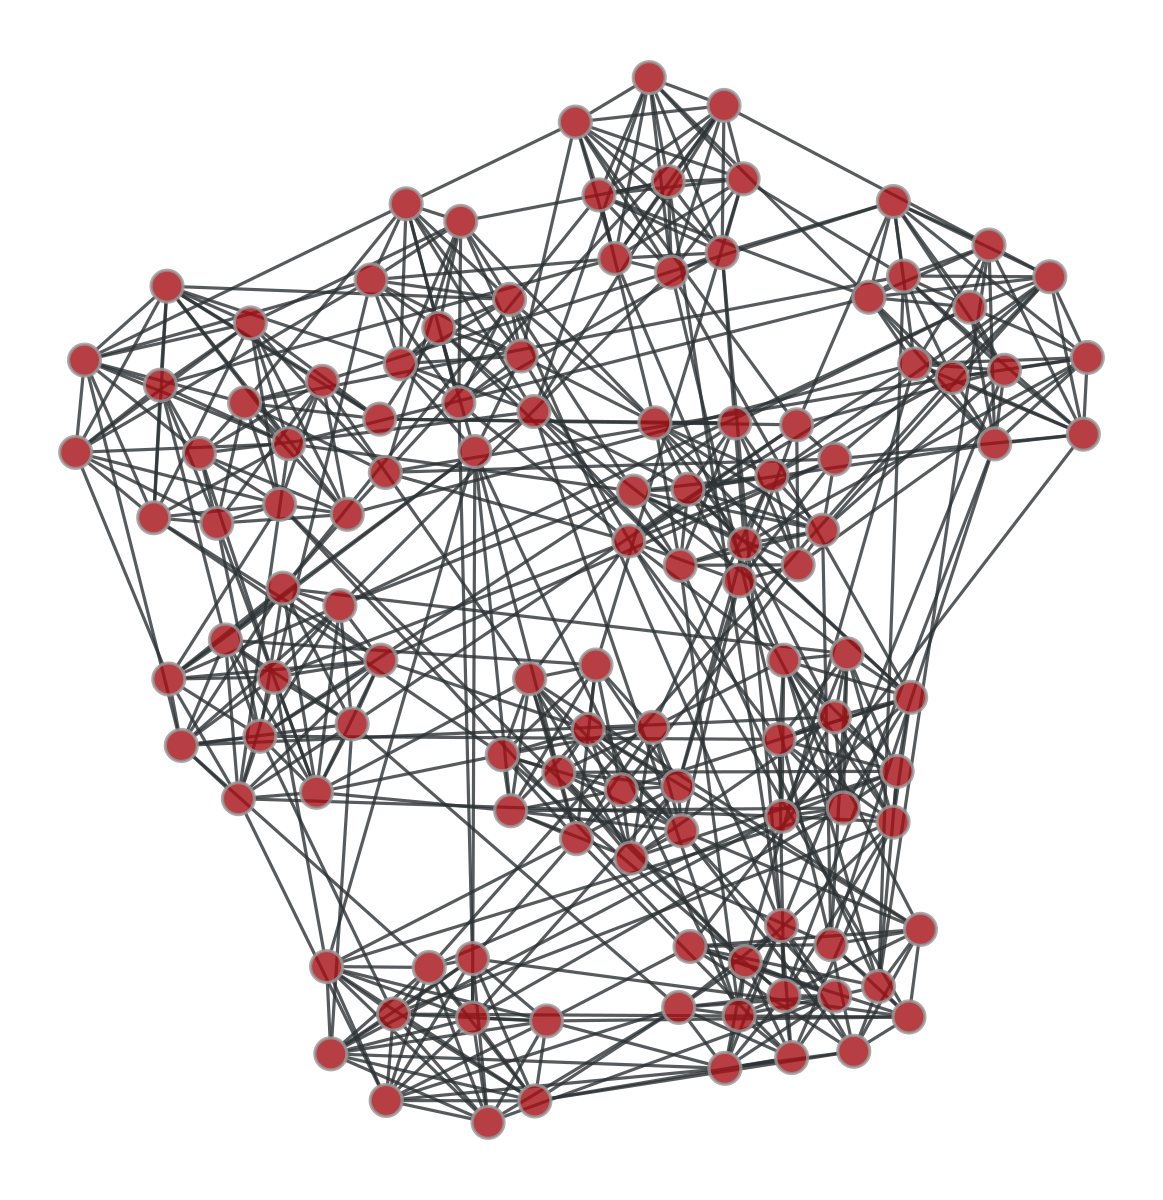

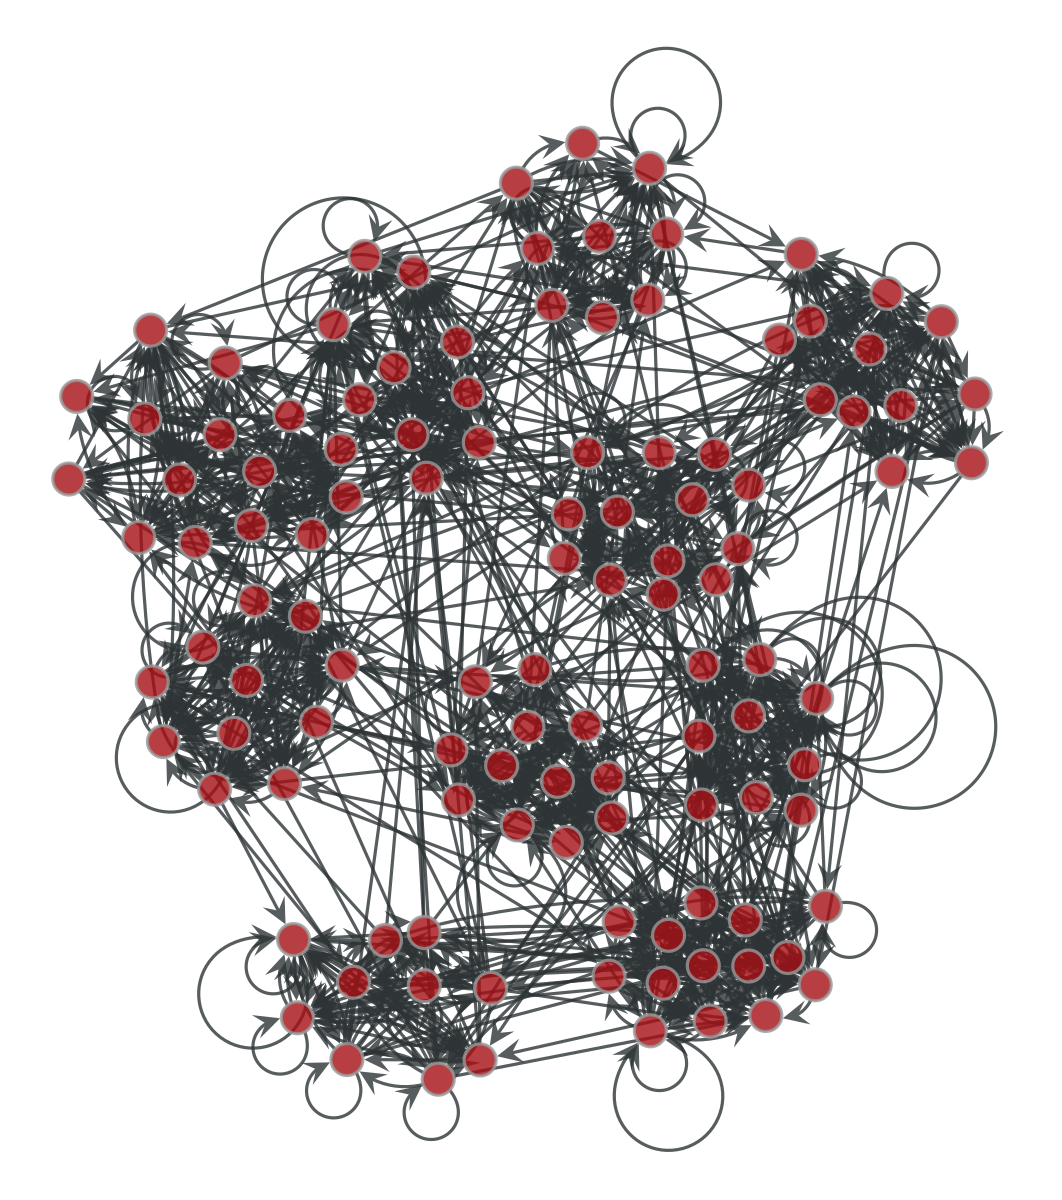

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x16ee4c1c0, at 0x16ee47100>

In [214]:
b = state.b.a
m = state.get_matrix()
print(type(b))
u = generate_sbm(state.b.a, adjacency(state.get_bg(),state.get_ers()).T,g.degree_property_map("out").a,g.degree_property_map("in").a, directed=True)

graph_draw(g, g.vp.pos)
graph_draw(u, u.own_property(g.vp.pos))

In [195]:
# Matrix visualisation

b = contiguous_map(state.get_blocks())
state = state.copy(b=b)

e = state.get_matrix()

B = state.get_nonempty_B()
plt.matshow(e.todense()[:B, :B])
plt.savefig("fig.pdf")


<class 'graph_tool.Graph'>


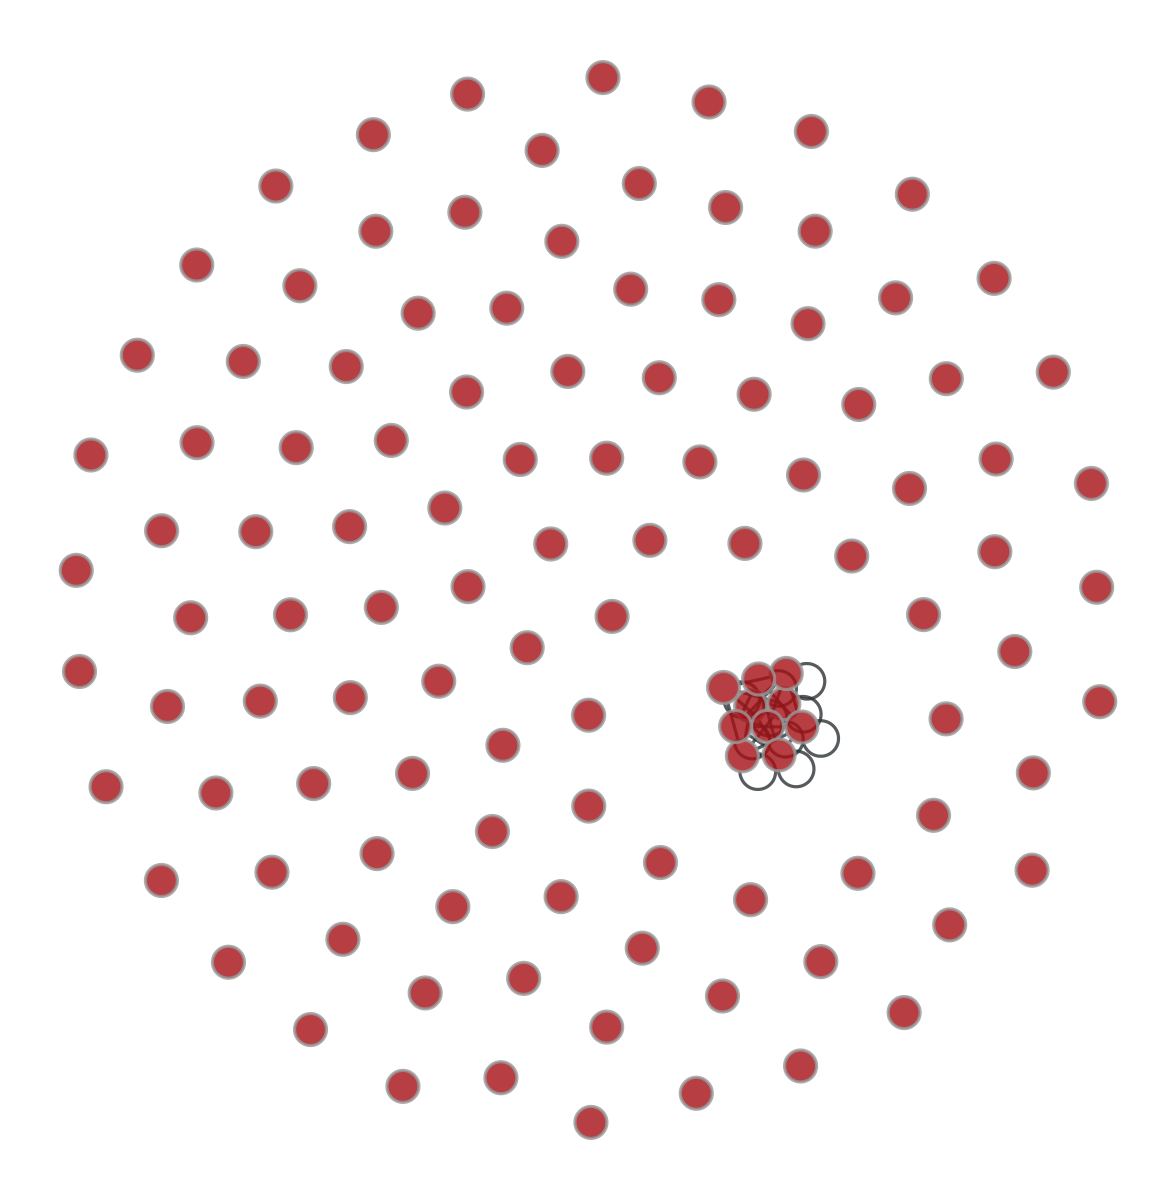

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x16ea5deb0, at 0x16eaa0fa0>

In [217]:
print(type(state.get_bg()))
graph_draw(state.get_bg())

Change in description length: -59.198525809051254
Number of accepted vertex moves: 1404


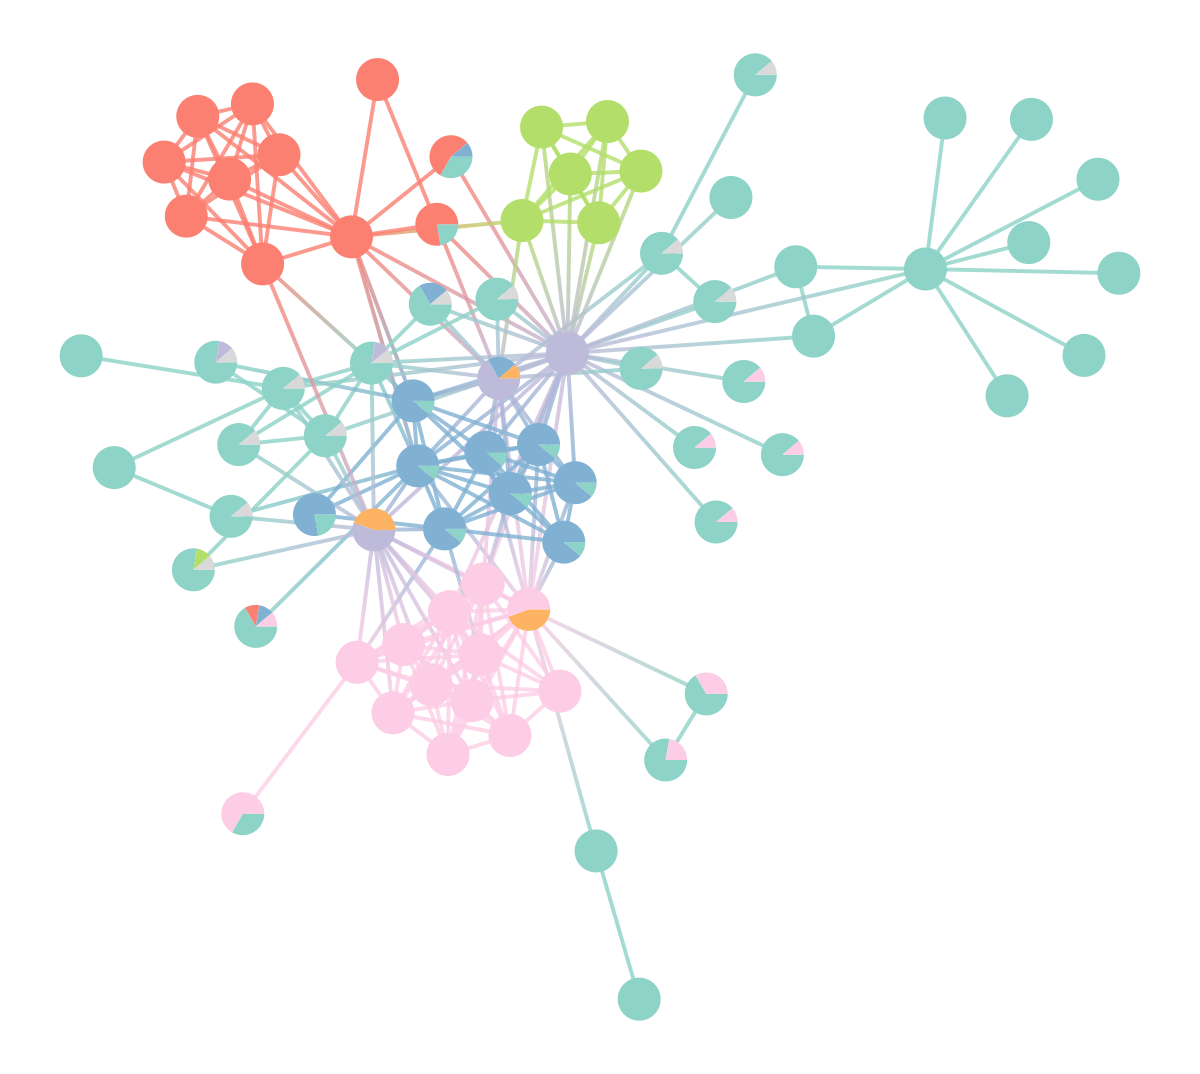

(706.9169984757464, 57138, 15667)

In [221]:
g = collection.data["lesmis"]

state = BlockState(g)   # This automatically initializes the state with a partition
                           # into one group. The user could also pass a higher number
                           # to start with a random partition of a given size, or pass a
                           # specific initial partition using the 'b' parameter.

# Now we run 1,000 sweeps of the MCMC. Note that the number of groups
# is allowed to change, so it will eventually move from the initial
# value of B=1 to whatever is most appropriate for the data.

dS, nattempts, nmoves = state.multiflip_mcmc_sweep(niter=10)

print("Change in description length:", dS)
print("Number of accepted vertex moves:", nmoves)

mcmc_equilibrate(state, wait=10, nbreaks=2, mcmc_args=dict(niter=10))

# We will first equilibrate the Markov chain
mcmc_equilibrate(state, wait=10, mcmc_args=dict(niter=10))

bs = [] # collect some partitions

def collect_partitions(s):
   global bs
   bs.append(s.b.a.copy())

# Now we collect partitions for exactly 100,000 sweeps, at intervals
# of 10 sweeps:
mcmc_equilibrate(state, force_niter=10, mcmc_args=dict(niter=10),
                    callback=collect_partitions)

# Disambiguate partitions and obtain marginals
pmode = PartitionModeState(bs, converge=True)
pv = pmode.get_marginal(g)

# Now the node marginals are stored in property map pv. We can
# visualize them as pie charts on the nodes:
state.draw(pos=g.vp.pos, vertex_shape="pie", vertex_pie_fractions=pv)
h = np.zeros(g.num_vertices() + 1)

def collect_num_groups(s):
    B = s.get_nonempty_B()
    h[B] += 1

# Now we collect partitions for exactly 100,000 sweeps, at intervals
# of 10 sweeps:
mcmc_equilibrate(state, force_niter=10, mcmc_args=dict(niter=10),
                    callback=collect_num_groups)



In [225]:
print(B)
print(state.get_Be())
print(h)

10
5.339334596871278
[0. 0. 0. 0. 0. 0. 0. 9. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
